In [32]:
%pip install pyclustering
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 1.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES

In [23]:
import pandas as pd

# Use a raw string by adding 'r' before the file path
file_path = r'SRP158491_normalized_logscaled_std_sorted.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,refinebio_accession_code,CD4,CD8A,KLRC4-KLRK1,CD8B,STXBP2,ADGRG1,GINS3,GZMH,XIST,...,IGHV3-43,MYADM-AS2,ALDH1A3,NDUFV1-DT,ASCL5,KCNJ12,SPRR4,HSD17B3-AS1,LOC114841035,Group
0,SRR7725764,8.164929,0.000000,0.000000,2.165702,0.000000,2.591752,8.125052,3.048034,1.728541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
1,SRR7725765,8.328641,2.373090,3.572271,2.013168,0.000000,8.683048,6.860148,8.635401,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
2,SRR7725767,0.000000,7.783076,6.575891,7.922238,7.388587,0.000000,9.744305,4.351330,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
3,SRR7725768,0.000000,8.555245,7.407132,6.659247,0.000000,7.408645,0.404595,8.011064,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
4,SRR7725770,1.150113,8.135226,6.840089,8.626322,0.000000,3.858808,7.499813,2.710086,0.732019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy


In [24]:
# Select only numeric columns (genes)
df_numeric = df.select_dtypes(include=[float, int])

# Display the shape to confirm it's working
df_numeric.shape

(119, 31644)

In [25]:
# Calculate the variance for each gene
gene_variances = df_numeric.var(axis=0)

# Select the top 5,000 genes with the highest variance
top_5000_genes = gene_variances.nlargest(5000).index

# Subset the dataframe to only include those top 5,000 genes
df_top_5000_genes = df_numeric[top_5000_genes]

# Display the new shape of the data to confirm
df_top_5000_genes.shape

(119, 5000)

## Perform PAM Clustering for different k

In [18]:
from sklearn.metrics import silhouette_score

# Convert the dataframe to a NumPy array
data = df_top_5000_genes.to_numpy()

# Define a range of k values to explore
k_values = [2, 3, 4, 5]

# Store results
cluster_results = {}
silhouette_scores = {}

for k in k_values:
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Initialize medoids randomly for each k
    initial_medoids = np.random.choice(len(data), k, replace=False)
    
    # Create and process PAM instance
    pam_instance = kmedoids(data, initial_medoids)
    pam_instance.process()
    
    # Get clusters and medoids
    clusters = pam_instance.get_clusters()
    medoids = pam_instance.get_medoids()
    
    # Assign cluster labels
    labels = np.zeros(len(data))
    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            labels[sample_idx] = cluster_idx
    
    # Calculate Silhouette Score
    try:
        score = silhouette_score(data, labels)
    except ValueError:
        score = 'Undefined (only one cluster present)'
    
    # Store results
    cluster_results[k] = clusters
    silhouette_scores[k] = score
    
    print(f"\nNumber of Clusters (k={k}):")
    print("Clusters:", clusters)
    print("Medoids:", medoids)
    print(f"Silhouette Score: {score}")


Number of Clusters (k=2):
Clusters: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118], [18, 19, 26, 80, 88]]
Medoids: [31 88]
Silhouette Score: 0.5045946596283893

Number of Clusters (k=3):
Clusters: [[0, 2, 4, 6, 10, 11, 13, 15, 16, 22, 24, 25, 29, 34, 35, 37, 41, 42, 44, 49, 51, 55, 58, 62, 66, 69, 73, 74, 76, 81, 83, 85, 86, 87, 90, 92, 95, 96, 98, 100, 103, 106, 107, 112, 114, 118], [1, 3, 5, 7, 8, 9, 12, 14, 17, 20, 21, 23, 27, 28, 30, 31, 32, 33, 36, 38, 39, 40, 43, 45, 46, 47, 48, 50, 52, 53, 54, 56, 57, 59, 60, 61, 63, 64, 65, 67, 68, 70, 71, 72, 75, 77, 78, 79, 82, 8

## PAM clustering for different numbers of genes (10, 100, 1,000, 10,000) using k = 3

In [28]:
import numpy as np
import pandas as pd
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.metrics import silhouette_score

# Define the different numbers of genes to test
gene_counts = [10, 100, 1000, 10000]

# Store clustering results
clustering_results = {}

for n_genes in gene_counts:
    # Select top n_genes based on variance
    gene_variances = df_top_5000_genes.var(axis=0)
    top_genes = gene_variances.nlargest(n_genes).index
    df_top_genes = df_top_5000_genes[top_genes]
    data = df_top_genes.to_numpy()
    
    # Perform PAM clustering with k = 3
    np.random.seed(42)
    initial_medoids = np.random.choice(len(data), 3, replace=False)
    pam_instance = kmedoids(data, initial_medoids)
    pam_instance.process()
    clusters = pam_instance.get_clusters()
    
    # Assign cluster labels
    labels = np.zeros(len(data), dtype=int)
    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            labels[sample_idx] = cluster_idx
    
    # Store the labels
    clustering_results[n_genes] = labels
    
    print(f"Clustering completed for top {n_genes} genes.")

Clustering completed for top 10 genes.
Clustering completed for top 100 genes.
Clustering completed for top 1000 genes.
Clustering completed for top 10000 genes.


## Compare Clustering Results Using Chi-Squared Tests

In [37]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Define the gene counts you want to compare
gene_counts = [10, 100, 1000, 10000]

# Initialize empty lists for sources, targets, values, and labels
sources = []
targets = []
values = []
labels = []

# Create a global label index to avoid duplicate label names
label_dict = {}

# Keep track of how many labels we have so far
current_label_idx = 0

# Loop through consecutive pairs of gene counts and generate transition counts
for i in range(len(gene_counts) - 1):
    n_genes1 = gene_counts[i]
    n_genes2 = gene_counts[i + 1]

    # Get the clustering labels for each gene count
    labels1 = clustering_results[n_genes1]
    labels2 = clustering_results[n_genes2]

    # Create a DataFrame for the Sankey plot
    sankey_df = pd.DataFrame({
        'Source': labels1,
        'Target': labels2
    })

    # Count the transitions
    transition_counts = sankey_df.groupby(['Source', 'Target']).size().reset_index(name='Count')

    # Define unique labels for source and target clusters
    source_labels = [f'{n_genes1} Genes Cluster {i}' for i in np.unique(labels1)]
    target_labels = [f'{n_genes2} Genes Cluster {i}' for i in np.unique(labels2)]
    
    # Add new labels to the global dictionary and assign them an index
    for label in source_labels + target_labels:
        if label not in label_dict:
            label_dict[label] = current_label_idx
            current_label_idx += 1

    # Map the clusters to the indices for plotting
    transition_counts['Source_Idx'] = transition_counts['Source'].map(lambda x: label_dict[f'{n_genes1} Genes Cluster {x}'])
    transition_counts['Target_Idx'] = transition_counts['Target'].map(lambda x: label_dict[f'{n_genes2} Genes Cluster {x}'])

    # Append sources, targets, and values to the global lists
    sources += list(transition_counts['Source_Idx'])
    targets += list(transition_counts['Target_Idx'])
    values += list(transition_counts['Count'])

# Extract labels for the plot
labels = list(label_dict.keys())

# Create the Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    ))])

# Update layout with a meaningful title
fig.update_layout(title_text="Cluster Membership Changes: 10, 100, 1000, and 10000 Genes", font_size=10)
fig.show()

## Create Alluvial Diagram (Sankey Plot)

In [36]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Define the gene counts you want to compare
gene_counts = [10, 100, 1000, 5000, 10000]

# Initialize empty lists for sources, targets, values, and labels
sources = []
targets = []
values = []
labels = []

# Create a global label index to avoid duplicate label names
label_dict = {}

# Keep track of how many labels we have so far
current_label_idx = 0

# Loop through consecutive pairs of gene counts and generate transition counts
for i in range(len(gene_counts) - 1):
    n_genes1 = gene_counts[i]
    n_genes2 = gene_counts[i + 1]

    # Get the clustering labels for each gene count
    labels1 = clustering_results[n_genes1]
    labels2 = clustering_results[n_genes2]

    # Create a DataFrame for the Sankey plot
    sankey_df = pd.DataFrame({
        'Source': labels1,
        'Target': labels2
    })

    # Count the transitions
    transition_counts = sankey_df.groupby(['Source', 'Target']).size().reset_index(name='Count')

    # Define unique labels for source and target clusters
    source_labels = [f'{n_genes1} Genes Cluster {i}' for i in np.unique(labels1)]
    target_labels = [f'{n_genes2} Genes Cluster {i}' for i in np.unique(labels2)]
    
    # Add new labels to the global dictionary and assign them an index
    for label in source_labels + target_labels:
        if label not in label_dict:
            label_dict[label] = current_label_idx
            current_label_idx += 1

    # Map the clusters to the indices for plotting
    transition_counts['Source_Idx'] = transition_counts['Source'].map(lambda x: label_dict[f'{n_genes1} Genes Cluster {x}'])
    transition_counts['Target_Idx'] = transition_counts['Target'].map(lambda x: label_dict[f'{n_genes2} Genes Cluster {x}'])

    # Append sources, targets, and values to the global lists
    sources += list(transition_counts['Source_Idx'])
    targets += list(transition_counts['Target_Idx'])
    values += list(transition_counts['Count'])

# Extract labels for the plot
labels = list(label_dict.keys())

# Create the Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    ))])

# Update layout with a meaningful title
fig.update_layout(title_text="Cluster Membership Changes: 10, 100, 1000, 5000, and 10000 Genes", font_size=10)
fig.show()

KeyError: 5000

## Visualization

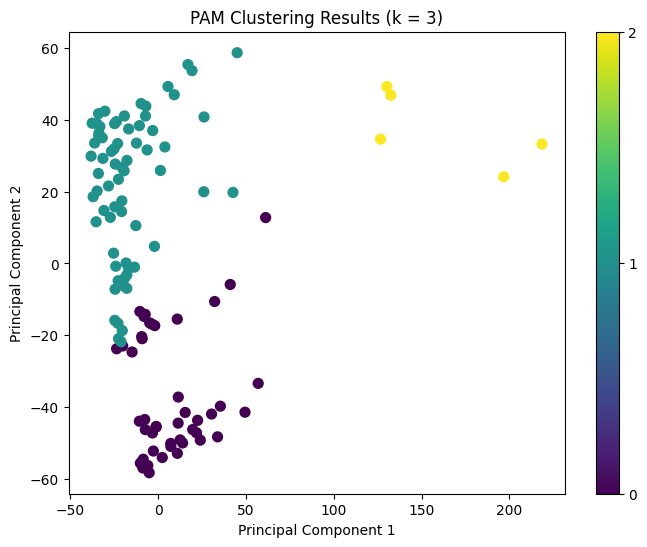

In [34]:
import numpy as np
import pandas as pd
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df_5000_numpy = df_top_5000_genes.to_numpy()
k = 3
np.random.seed(42)
initial_medoids = np.random.choice(len(df_5000_numpy), k, replace=False)

# Step 4: Perform PAM clustering
pam_instance = kmedoids(df_5000_numpy, initial_medoids)
pam_instance.process()

# Step 5: Get clusters and convert them into a labeling system
clusters = pam_instance.get_clusters()

# Create an array to store the cluster labels for each sample
kmedoids_labels = np.zeros(len(df_5000_numpy)).astype(int)
for i, cluster in enumerate(clusters):
    for sample_idx in cluster:
        kmedoids_labels[sample_idx] = int(i)

# Step 6: Perform PCA to reduce the data to 2 components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_5000_numpy)

# Step 7: Plot the PCA-transformed data with the cluster labels
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmedoids_labels, cmap='viridis', s=50)
plt.title('PAM Clustering Results (k = 3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(k))
plt.show()